### ML4CMS Homework 4 Gradient
#### Viswambhar Yasa 65074

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Task-1 Finding the minimum value for the function x^4-10^3+2 using gradient descent method.

In [2]:
def f(x):
    return x**4 - 10* x**3 + 2
def df(x): #Derivative funciton
    return 4 * x**3 - 30 * x**2
def gradient(g_X,precision,learning_rate):
    grad_x = []
    grad_x.append([g_X,f(g_X)])
    max_iters = 100 #maximum number of iterations
    for i in range(max_iters):
        p_x = g_X
        g_X = p_x - learning_rate*df(p_x)
        grad_x.append([g_X,f(g_X)])
        error = g_X-p_x
        if abs(error)<=precision:
            iteration = i
            print("Minimum at ",g_X)
            print("Number of iterations = ",i)
            break
        iteration = i
        if (iteration==max_iters-1):
            print("Does not converger, change the learning rate")
    return grad_x


Minimum at  7.499999683022373
Number of iterations =  70


Text(0, 0.5, 'f(x)=x**4 - 10* x**3 + 2')

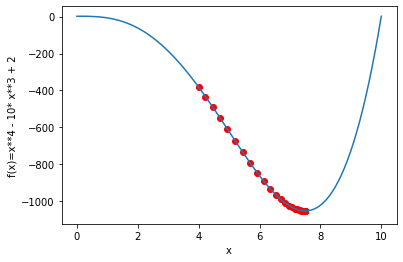

In [3]:
x0 = 4 #initial point
learning_rate = 0.001 #step size multiplier
precision = 1e-7 #desired precision of result


x = np.linspace(0,10,100)
fig,ax=plt.subplots()
ax.plot(x,f(x))
grad_x = np.array(gradient(x0,precision,learning_rate))
for i in range(len(grad_x)):
    ax.scatter(grad_x[i,0],grad_x[i,1],c='r')
ax.set_xlabel('x')
ax.set_ylabel('f(x)=x**4 - 10* x**3 + 2')

### Task-2 create a noise data set for given function f(x) = 0.3x^2 + 0.5x -1.

In [4]:
def F(x):
    return 0.3*x**2+0.5*x-1

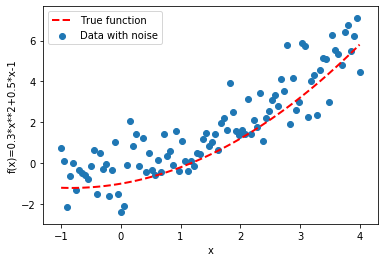

In [5]:
np.random.seed(10)
xn=np.linspace(-1,4,100)
yn=F(xn)
y_noise=yn+np.random.normal(0.6,size=len(xn))
fig,pl=plt.subplots()
pl.plot(xn,yn,linestyle='dashed',c='r',linewidth=2)
pl.scatter(xn,y_noise)
pl.set_xlabel('x')
pl.set_ylabel('f(x)=0.3*x**2+0.5*x-1')
plt.legend(['True function','Data with noise']) 

#### np.random.normal(): 
    This function generate a random value with in the normal distribution.
#### np.random.seed():
     To initialize random generator,seed give the starting value for the random sequence
#### np.random.choice(...):
    gives an array of random number
    replace is boolean operartor: it give unique values if false
    This  np.random.choice(range(10), 11, replace=False) fails because the array is outof bound
    and the array can have only unique values in it. 

 ### Task-3.1 Spliting data into training and test datasets

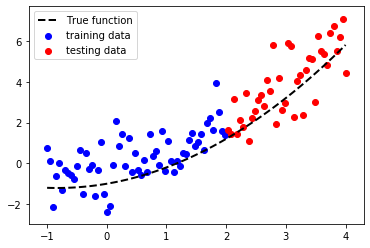

In [6]:
train_x = xn[:60]
train_y = y_noise[:60]
test_x = xn[60:]
test_y = y_noise[60:]
plt.plot(xn,yn,linestyle='--',c='black',linewidth=2)

plt.scatter(train_x, train_y,c='b')
plt.scatter(test_x, test_y,c='r')
plt.legend(['True function','training data','testing data']) 

###### Taking the first 60 as training dataset and remaining as testing would not give accurate results as overfitting may happen instead training dataset is randomly generated

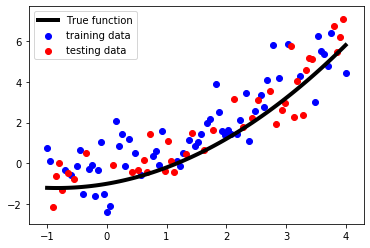

In [7]:
data_set=np.vstack((xn, y_noise)).T
np.random.shuffle(data_set)
x_training=data_set[:60,0]
y_training=data_set[:60,1]
x_testing=data_set[60:,0]
y_testing=data_set[60:,1]
plt.plot(xn,yn,c='black',linewidth=4)
plt.scatter(x_training, y_training,c='b')
plt.scatter(x_testing, y_testing,c='r')
plt.legend(['True function','training data','testing data']) 

#### TASK-4  f(x)= a+bx+cx^2)

In [8]:
def polynomial(x,a,b,c):
    return a+b*x+c*x**2

def cost_func(x,a,b,c):
    MSE=np.average((y-polynomial(x,a,b,c))**2)
    return MSE

def Min_MSE(y,x,a,b,c):
    df_da = np.average(2*(polynomial(x,a,b,c)-y))
    df_db = np.average(2*(polynomial(x,a,b,c)-y)*x)
    df_dc = np.average(2*(polynomial(x,a,b,c)-y)*x**2)
    return df_da,df_db,df_dc

def gradient_descent(y,x,g_a,g_b,g_c,precision,learning_rate):
    coefficients=[]
    coefficients.append([g_a,g_b,g_c])
    max_iterations = 1000 #maximum number of iterations
    for i in range(max_iterations):
        p_a = g_a
        p_b = g_b
        p_c = g_c
        df_da,df_db,df_dc=Min_MSE(y,x,g_a,g_b,g_c)
        g_a = p_a - learning_rate * df_da
        g_b = p_b - learning_rate * df_db
        g_c = p_c - learning_rate * df_dc
        coefficients.append([g_a,g_b,g_c])
        error1 = g_a-p_a
        error2 = g_b-p_b
        error3 = g_c-p_c
        if abs(error1)<=precision and abs(error2)<=precision and abs(error3)<=precision:
            iteration = i
            print("Number of iterations = ",i)
            break
        iteration = i
        if (iteration==max_iterations-1):
            print("Does not converger, change the learning rate")
    return coefficients


Does not converger, change the learning rate
[-0.10456900860936948, 0.5454456711506677, 0.2612991801057256]


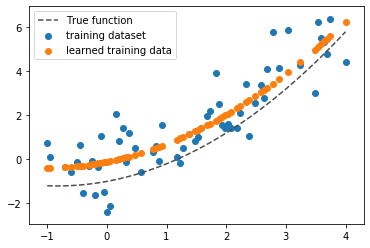

In [10]:
precision=0.00001
learning_rate=0.005
coefficients=gradient_descent(y_training,x_training,1,1,1,precision,learning_rate)
print(coefficients[-1])
a,b,c=coefficients[-1]
y_learned=polynomial(x_training,a,b,c)
plt.plot(xn,yn,'--',c='0.3')
plt.scatter(x_training,y_training)
plt.scatter(x_training,y_learned)
plt.legend(['True function','training dataset','learned training data']) 

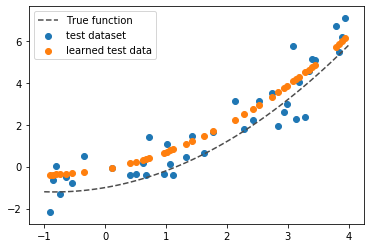

In [11]:
y_test=polynomial(x_testing,a,b,c)
plt.plot(xn,yn,'--',c='0.3')
plt.scatter(x_testing,y_testing)
plt.scatter(x_testing,y_test)
plt.legend(['True function','test dataset','learned test data']) 